100
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 10,201
Trainable params: 10,201
Non-trainable params: 0
_________________________________________________________________
Evaluating on test data:
2/2 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7350
test loss, test accuracy: [0.5891721844673157, 0.7350000143051147]
Evaluating on training data:
7/7 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7275
train loss, train accuracy: [0.5730950832366943, 0.7275000214576721]
[[145   0]
 [ 53   2]]


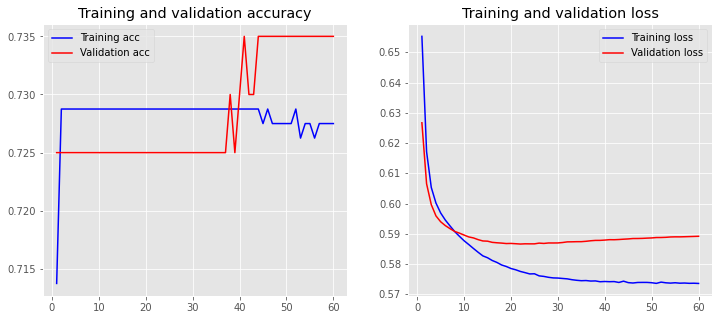

In [5]:
# first attempt at keras

# keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# doc2vec
#   gensim modules
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec

# numpy
import numpy as np

# get doc2vec numpy vectors
url = 'https://github.com/limestonestreams/thesis/blob/master/doc2vec_np_arrays.npz?raw=true'

path = tf.keras.utils.get_file('doc2vec_np_arrays.npz', url)
with np.load(path) as d2v_np:
  train_arrays = d2v_np['train_arrays']
  train_labels = d2v_np['train_labels']
  test_arrays = d2v_np['test_arrays']
  test_labels = d2v_np['test_labels']

print(train_arrays.shape[1]) #number of features (shape of each sample), which feeds into the first layer's input_shape

# Define Sequential model with 3 layers
# from https://stackoverflow.com/questions/50564928/how-to-use-sentence-vectors-from-doc2vec-in-keras-sequntial-model-for-sentence-s

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (100,))) #using rectified linear unit (ReLU) activation for hidden layers is most common
#model.add(Dense(32, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #use sigmoid activation for the final layer in a binary classification problem (softmax for a multi-class classification problem)

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy']) #binary crossentrophy loss is used for binary classification problems

model.summary()

history = model.fit(train_arrays, train_labels, batch_size = 10, epochs = 60, validation_data = (test_arrays, test_labels), verbose = 0)

# from https://www.tensorflow.org/guide/keras/train_and_evaluate/
print("Evaluating on test data:")
results_test = model.evaluate(test_arrays, test_labels, batch_size = 128)
print("test loss, test accuracy:", results_test)

# and for training set
print("Evaluating on training data:")
results_train = model.evaluate(train_arrays, train_labels, batch_size = 128)
print("train loss, train accuracy:", results_train)

# confusion matrix
from sklearn.metrics import confusion_matrix
pred_labels = model.predict_classes(test_arrays)
conf_matrix = confusion_matrix(test_labels, pred_labels)
print(conf_matrix)

# loss visualisation function from https://realpython.com/python-keras-text-classification/
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#for key in history.history.keys():
#    print(key)

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)
